# Decision Tree Prime Numbers
This file can serve as a starting point for a decision tree analysis. It contains the following steps:
* Creation of the data set
* Creation of the decision tree classifier
* Training of the decision tree classifier
* Visualisation of the decision tree
* Testing the accuracy of the decision tree classifications
* Visualisation of the feature importances

## Importing the required packages
Make sure you have previously installed the packages in requirements.txt in your chosen environment using pip or conda.
If you are not sure how to do this, please follow the quick start guide in the readme file.

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Creation of the data set

In [87]:
# Number of points in the data set
n = 100

# Features
# Value
feature_value = np.arange(1,n+1)
# Number of divisors
feature_ndiv = np.zeros(n).astype(int) # Initialise
for i in range(n):
    v = feature_value[i]
    for j in range(1, v + 1):
        if not v % j: # j is a divisor of v
            feature_ndiv[i] = feature_ndiv[i]+1


# Class
class_primeGT10 = np.zeros(n).astype(int) # Initialise
for i in range(n):
    if feature_ndiv[i] == 2. and feature_value[i] > 10:
        class_primeGT10[i] = 1


For convenience, the data is stored in a DataFrame

In [88]:
# Titles of the features
titles_f = ['value','number of divisors']
# Title of the class
title_c = 'Prime > 10'

# Create the DataFrame
df = pd.DataFrame(data={titles_f[0]: feature_value,
                        titles_f[1]: feature_ndiv,
                        title_c: class_primeGT10})

# Show the first five lines of the data set
df.head()

,value,number of divisors,Prime > 10
0,1,1,0
1,2,2,0
2,3,2,0
3,4,3,0
4,5,2,0


### Splitting the data into training and test sets
The training set is used to the decision tree.  
The test set contains data that the decision tree will not see during training. It can be used to test the accuracy of its predictions.

In [89]:
# Size of the test set (0.2 --> 20 % of the samples)
test_size = 0.2

# Random state --> for reproducibility
random_state = 42

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df[titles_f], df[title_c], test_size=test_size, random_state=random_state)

print('Number of samples in the training set: ',len(y_train))
print('Number of samples in the test set: ',len(y_test))

Number of samples in the training set:  80
Number of samples in the test set:  20


## Creation of the decision tree classifier

### Set the hyperparameters

In [90]:
# Maximum tree depth
depth = 2

# Minimum number of samples per leaf
min_samples_leaf = 2

### Create the decision tree classifier

In [91]:
dtc = DecisionTreeClassifier(max_depth=depth, 
                             random_state=random_state, 
                             min_samples_leaf=min_samples_leaf)

## Training of the decision tree classifier

In [92]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, random_state=42)

## Visualisation of the decision tree

[Text(0.6, 0.8333333333333334, 'number of divisors <= 2.5\ngini = 0.305\nsamples = 80\nvalue = [65, 15]\nclass = others'),
 Text(0.4, 0.5, 'value <= 12.0\ngini = 0.278\nsamples = 18\nvalue = [3, 15]\nclass = Prime > 10'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = others'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]\nclass = Prime > 10'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 62\nvalue = [62, 0]\nclass = others'),
 Text(0.7, 0.6666666666666667, '  False')]

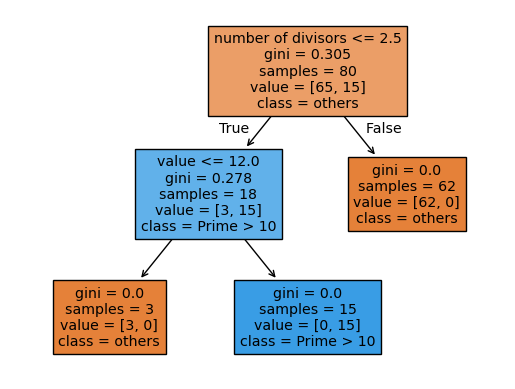

In [93]:
fig_tree, ax_tree = plt.subplots()
plot_tree(decision_tree=dtc, 
          filled=True,
          ax=ax_tree,
          feature_names=titles_f, 
          class_names=['others', title_c])

## Testing the accuracy of the decision tree classifications
The testing set that was previously split of the entire data set can be used test the accuracy of the decision tree classifier.  
For this purpose, trained decision tree is used to predict the class of the samples in the test set.  


In [94]:
# Predict the class of the samples in the test set
y_pred = dtc.predict(X_test)

The predicted classes can then be compared to the true classes.

In [95]:
# Compare to the true class
dfa = pd.DataFrame({'true': y_test, 'predicted': y_pred})
print(dfa)

    true  predicted
83     0          0
53     0          0
70     1          1
45     0          0
44     0          0
39     0          0
22     1          1
80     0          0
10     1          0
0      0          0
18     1          1
30     1          1
73     0          0
33     0          0
90     0          0
4      0          0
76     0          0
77     0          0
12     1          1
31     0          0


An intuitive way to graphically show the accuracy of the predictions is the confusion matrix.  
It shows number of samples which were classified correctly on the main diagonal and the number of misclassified samples on the other diagonal.

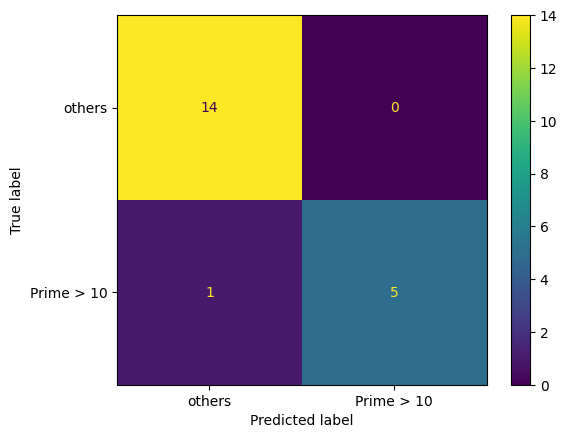

In [96]:
conf_matrix = confusion_matrix(y_test, y_pred)

disp_cm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                                display_labels=['others', title_c])
disp_cm.plot()

## Visualisation of the feature importances
The relative feature importances determined when training the decision tree.  
They help understand which features are most important for the classification of the training set.

Text(0.5, 0, 'Relative feature importance')

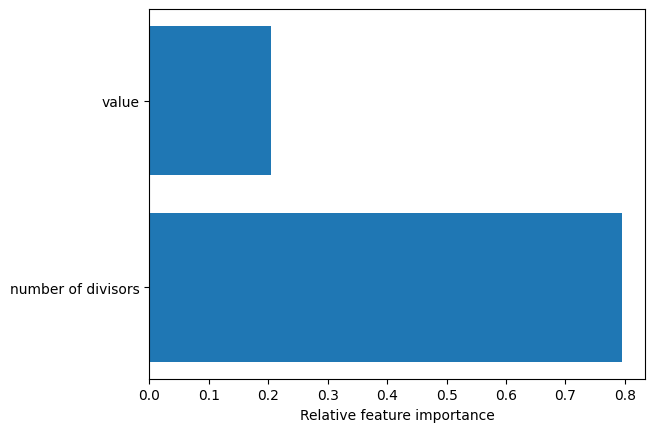

In [97]:
# Create the figure
fig_fi, ax_fi = plt.subplots()
# Prepare for bar plot
y_pos = np.arange(len(titles_f)) # position of the bars

# Plot the feature importances
ax_fi.barh(y=y_pos, 
           width=dtc.feature_importances_,
           align='center')
ax_fi.set_yticks(y_pos, labels=titles_f)

# Plot settings
ax_fi.invert_yaxis()
ax_fi.set_xlabel('Relative feature importance')